In [44]:
# import library
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# import file menjadi data frame
data=pd.read_csv('iris.csv')
# menghapus kolom 2,3,4
data.drop(data.columns[[2, 3, 4]], axis = 1, inplace = True)

In [45]:
# memberi header kolom
data.columns = ["x", "y"]
data.head()

,x,y
0,4.9,3.0
1,4.7,3.2
2,4.6,3.1
3,5.0,3.6
4,5.4,3.9


Text(0, 0.5, 'Y')

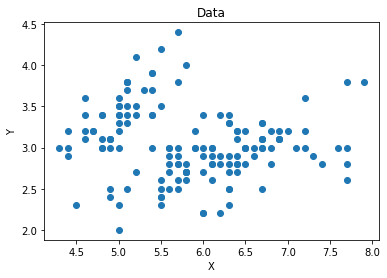

In [66]:
# visualisasi data menggunakan scatter plo
x1=data['x']
y1=data['y']
plt.scatter(x1,y1)
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")

In [67]:
# pendefinisian fungsi kriteria
def distance(cluster1,cluster2,criteria):
  #single link
  if criteria=='s':
    return np.min(cdist(cluster1, cluster2,'euclidean'))
  #complete link
  elif criteria=='c':
    return np.max(cdist(cluster1, cluster2,'euclidean'))
  #average link
  elif criteria=='a':
    return np.mean(cdist(cluster1, cluster2,'euclidean'))

In [68]:
# pendefinisian fungsi untuk memvisualisasikan data berdasarkan kriteria
def draw_div(clusters):
    for i, cluster in enumerate(clusters):    
      np_cluster = np.array(cluster)
      plt.scatter(np_cluster[:,0], np_cluster[:, 1], label = i)
    #plt.legend(bbox_to_anchor=(1.06, 1.06))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [69]:
# pendefinisian fungsi divisive clustering
def divise(data, dist):
    clusters1 = [data.copy()]
    while len(clusters1) < 8:
        clusters=clusters1.copy()
        minimum = 0
        best_labels = []
        best_cluster = []
        new_clusters = []
        for cluster in clusters:
            kmeans = KMeans(n_clusters=2, random_state=0).fit(cluster)
            current_labels = kmeans.labels_
            child1 = np.array([x for i, x in enumerate(cluster) if current_labels[i]==1])
            child2 = np.array([x for i, x in enumerate(cluster) if current_labels[i]==0])
            score = distance(child1,child2,dist)
            if score > minimum:
                minimum = score
                best_labels = current_labels
                best_cluster = cluster
                new_clusters = [child1.tolist(), child2.tolist()]
        clusters1.remove(best_cluster)
        clusters1 += new_clusters
        #if len(clusters1) in [2,4,8]:
        draw_div(clusters1)

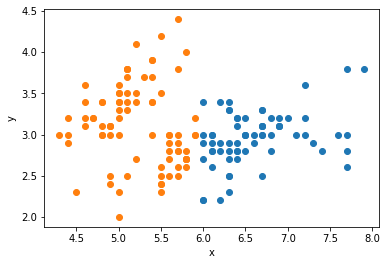

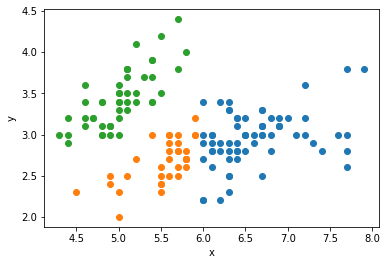

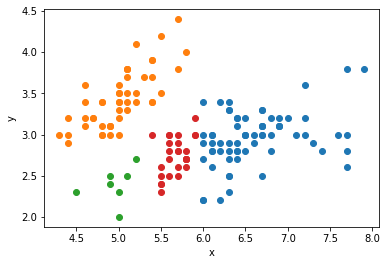

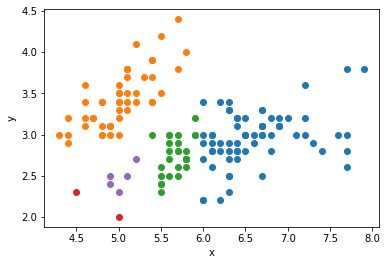

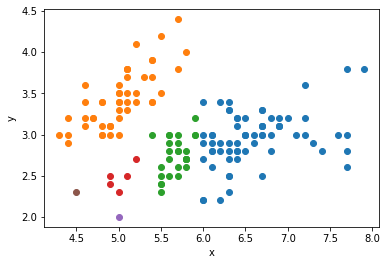

ValueError: n_samples=1 should be >= n_clusters=2.

In [70]:
# clustering data dengan kriteria singel
dataset=np.array(data)
divise(dataset,'s')

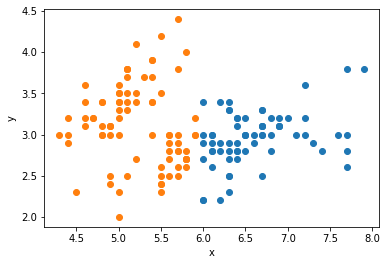

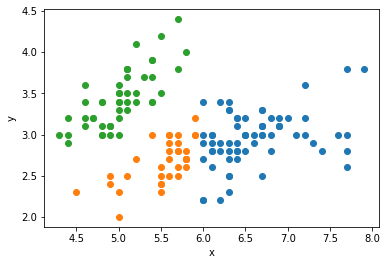

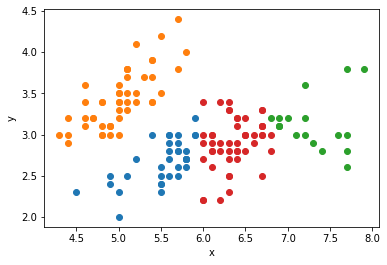

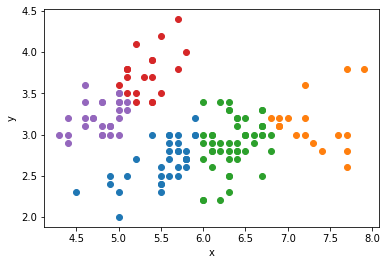

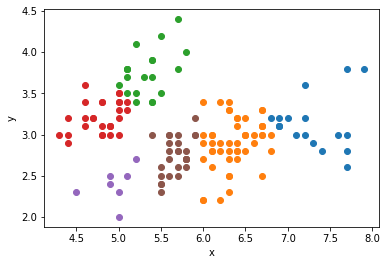

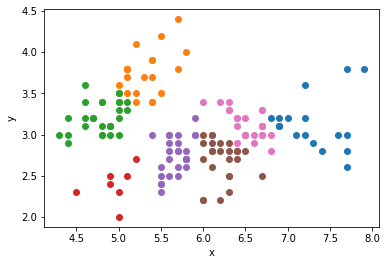

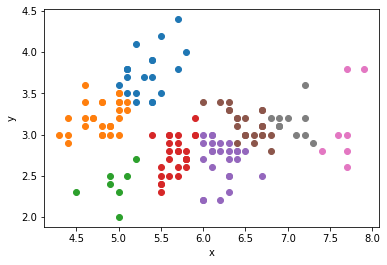

In [71]:
# clustering data dengan kriteria complete
divise(dataset,'c')

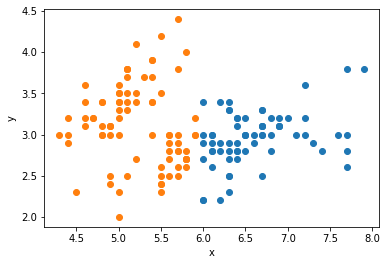

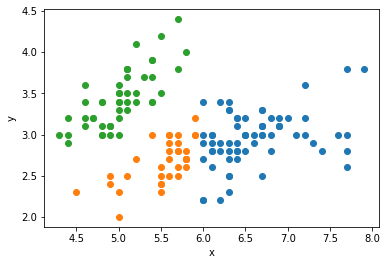

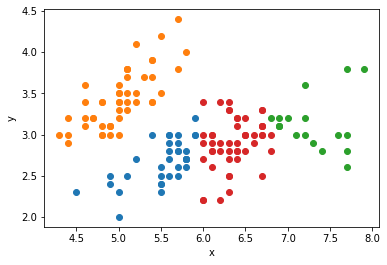

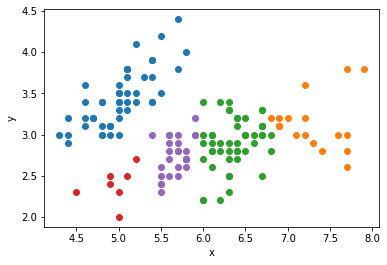

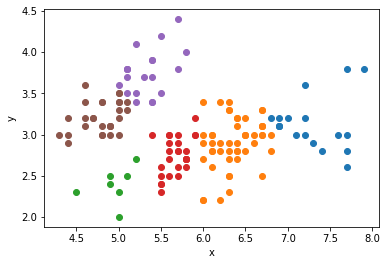

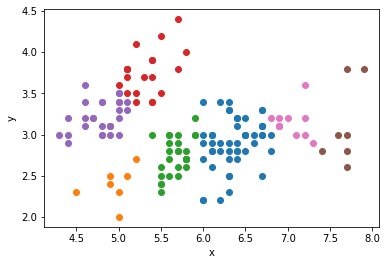

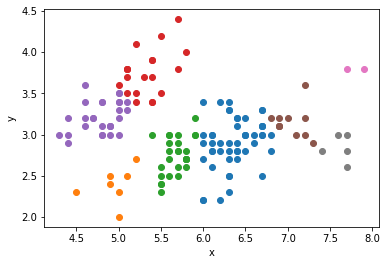

In [72]:
# clustering data dengan kriteria average
divise(dataset,'a')